In [3]:
# Importing the necessary packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading in the data set
df =pd.read_csv('csv_files/NBA_8YEAR.csv', header=0)

In [5]:
df.head()

,TEAM,DATE,MATCHUP,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/
0,GSW,6/5/19,GSW vs. TOR,L,241,109,36,91,39.6,12,...,83.3,13,28,41,25,8,3,14,21,-14.0
1,TOR,6/5/19,TOR @ GSW,W,239,123,43,82,52.4,17,...,95.2,5,35,40,30,9,10,14,22,14.0
2,GSW,6/2/19,GSW @ TOR,W,240,109,38,82,46.3,13,...,87,6,36,42,34,7,5,15,26,5.0
3,TOR,6/2/19,TOR vs. GSW,L,240,104,35,94,37.2,11,...,88.5,15,34,49,17,8,2,15,22,-5.0
4,GSW,5/30/19,GSW @ TOR,L,239,109,34,78,43.6,12,...,93.5,9,29,38,29,6,2,16,27,-9.0


In [6]:
df.shape

(22697, 24)

In [7]:
df.columns

Index(['TEAM', 'DATE', 'MATCHUP', 'W/L', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', '+/'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22697 entries, 0 to 22696
Data columns (total 24 columns):
TEAM       22697 non-null object
DATE       22697 non-null object
MATCHUP    22697 non-null object
W/L        22695 non-null object
MIN        22697 non-null int64
PTS        22697 non-null int64
FGM        22697 non-null int64
FGA        22697 non-null int64
FG%        22697 non-null object
3PM        22697 non-null int64
3PA        22697 non-null int64
3P%        22697 non-null object
FTM        22697 non-null int64
FTA        22697 non-null int64
FT%        22697 non-null object
OREB       22697 non-null int64
DREB       22697 non-null int64
REB        22697 non-null int64
AST        22697 non-null int64
STL        22697 non-null int64
BLK        22697 non-null int64
TOV        22697 non-null int64
PF         22697 non-null int64
+/         22697 non-null float64
dtypes: float64(1), int64(16), object(7)
memory usage: 4.2+ MB


In [9]:
# count how many missing values 

names = []
val = []

# Creating a for loop to see which ones are missing 
for col in df.columns:
    names.append(col)
    val.append(df[df.columns].isnull().sum())
    break

# Printing to see the results 
print(names, val)

['TEAM'] [TEAM       0
DATE       0
MATCHUP    0
W/L        2
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3PM        0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
+/         0
dtype: int64]


In [10]:
# Drop the row if it is missing a value 
df = df.dropna(axis=0, how='any', subset=['W/L'])
df.shape

(22695, 24)

In [11]:
# count how many missing values 

names = []
val = []

# Creating a for loop to see which ones are missing 
for col in df.columns:
    names.append(col)
    val.append(df[df.columns].isnull().sum())
    break

# Printing to see the results 
print(names, val)

['TEAM'] [TEAM       0
DATE       0
MATCHUP    0
W/L        0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3PM        0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
+/         0
dtype: int64]


In [12]:
df.columns

Index(['TEAM', 'DATE', 'MATCHUP', 'W/L', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', '+/'],
      dtype='object')

In [13]:
# Calculating Effective Field Goal (EFG) Percentage
df['EFG%'] = ((df['FGM']-df['3PM'] + 1.5 * df['3PM'])/ df['FGA'])

In [14]:
# Calculating Free Throw Rate (FTR)
df['FTR'] = df['FTA'] / df['FGA']

In [15]:
# Creating the Target column from the Result column
df['Target_L'] = df['W/L'].astype(str).str[0]

In [16]:
# Creating a function to bin the target variable
def target_binning(Target_L):
    if str(Target_L) == 'L':  # Will return 0 if a team loses the game
        return(0)
    else:                   # Will return 1 if a team wins the game
        return(1)

# Applying the function in order to bin the target variable 
df['Target'] = df['Target_L'].apply(target_binning)

In [17]:
df.head()

,TEAM,DATE,MATCHUP,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,AST,STL,BLK,TOV,PF,+/,EFG%,FTR,Target_L,Target
0,GSW,6/5/19,GSW vs. TOR,L,241,109,36,91,39.6,12,...,25,8,3,14,21,-14.0,0.461538,0.329670,L,0
1,TOR,6/5/19,TOR @ GSW,W,239,123,43,82,52.4,17,...,30,9,10,14,22,14.0,0.628049,0.256098,W,1
2,GSW,6/2/19,GSW @ TOR,W,240,109,38,82,46.3,13,...,34,7,5,15,26,5.0,0.542683,0.280488,W,1
3,TOR,6/2/19,TOR vs. GSW,L,240,104,35,94,37.2,11,...,17,8,2,15,22,-5.0,0.430851,0.276596,L,0
4,GSW,5/30/19,GSW @ TOR,L,239,109,34,78,43.6,12,...,29,6,2,16,27,-9.0,0.512821,0.397436,L,0


In [18]:
df2 = df.drop(['TEAM', 'DATE', 'MATCHUP', 'W/L', 'MIN', '+/', 'Target_L'], axis=1)

In [19]:
df2.shape

(22695, 21)

In [20]:
# Looking at the top of the data set after droppping columns that were not needed 
df2.head()

,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,...,DREB,REB,AST,STL,BLK,TOV,PF,EFG%,FTR,Target
0,109,36,91,39.6,12,36,33.3,25,30,83.3,...,28,41,25,8,3,14,21,0.461538,0.329670,0
1,123,43,82,52.4,17,38,44.7,20,21,95.2,...,35,40,30,9,10,14,22,0.628049,0.256098,1
2,109,38,82,46.3,13,34,38.2,20,23,87,...,36,42,34,7,5,15,26,0.542683,0.280488,1
3,104,35,94,37.2,11,38,28.9,23,26,88.5,...,34,49,17,8,2,15,22,0.430851,0.276596,0
4,109,34,78,43.6,12,31,38.7,29,31,93.5,...,29,38,29,6,2,16,27,0.512821,0.397436,0


In [21]:
df2.columns

Index(['PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'EFG%', 'FTR',
       'Target'],
      dtype='object')

In [22]:
# Renaming the columns in order get ride of the % signs 
df2.rename(columns={'FG%':'FGPerc','3P%':'3PPerc','FT%':'FTPerc','EFG%':'EFGPerc'}, inplace=True)

## EDA

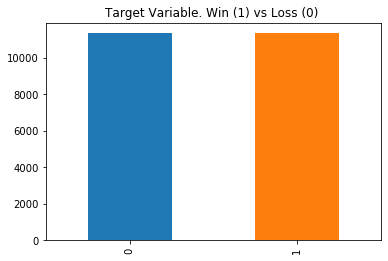

In [23]:
# Looking at the target variable
df2['Target'].value_counts().plot(kind='bar', title="Target Variable. Win (1) vs Loss (0) ")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1e859c438>,
      dtype=object)

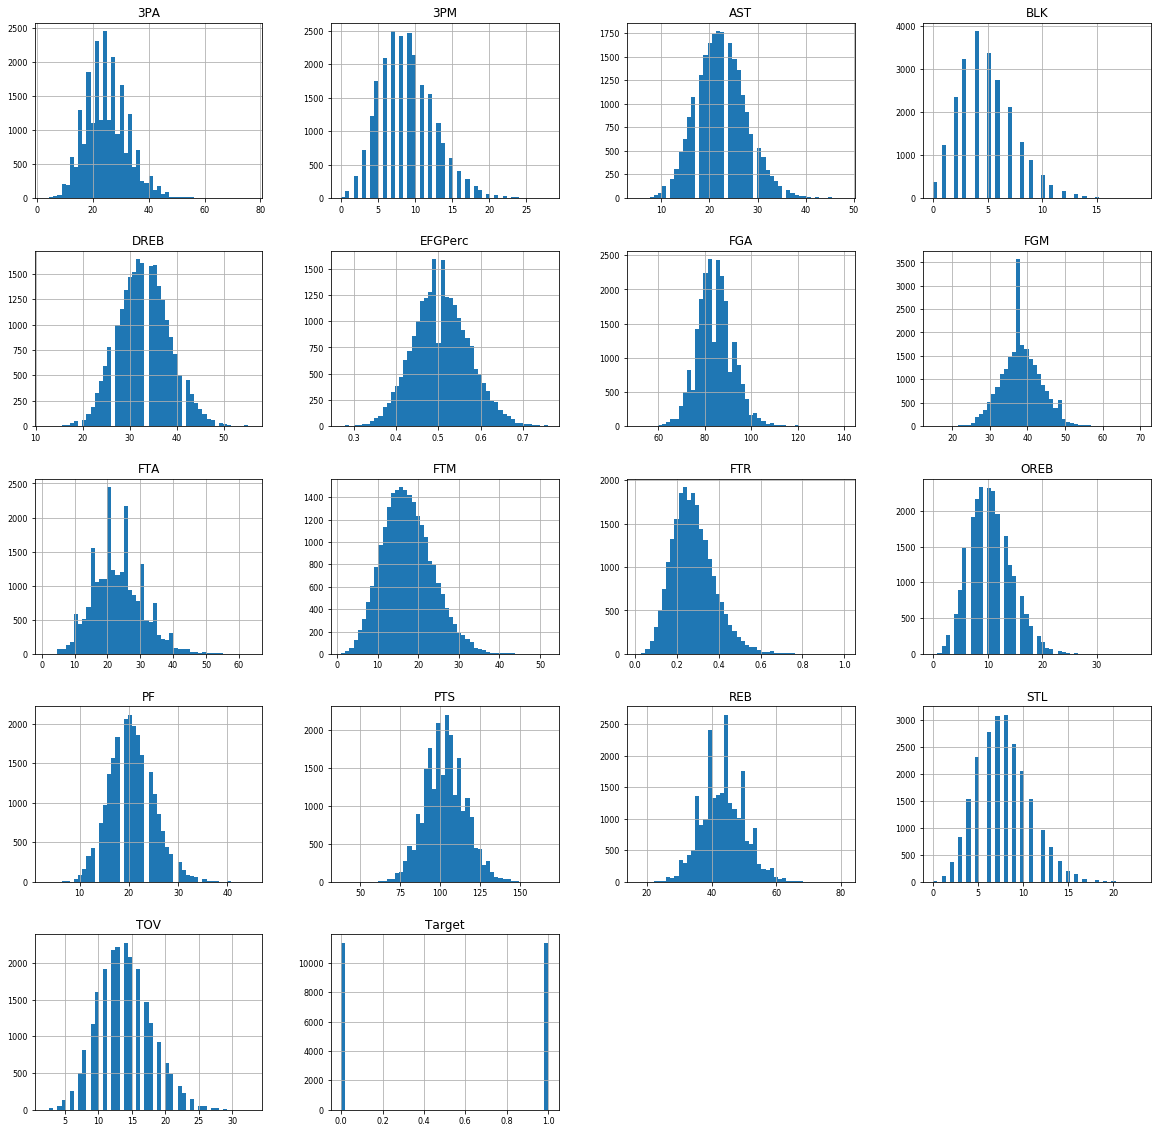

In [24]:
# Creating histograms of all of my variables to see distributions
df2.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)

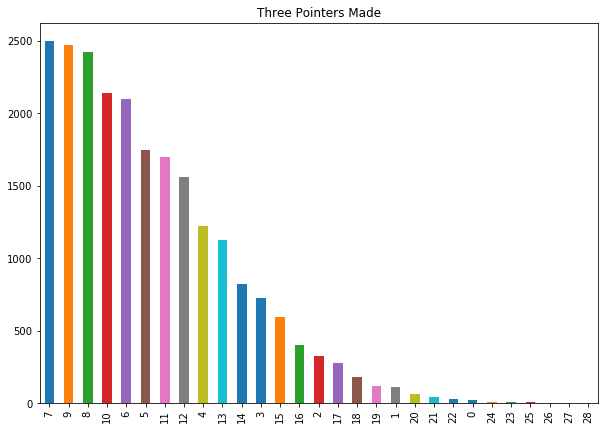

In [25]:
# Looking at breakdown of 3 Pointers Made
df2['3PM'].value_counts().plot.bar(figsize=(10,7), title='Three Pointers Made')

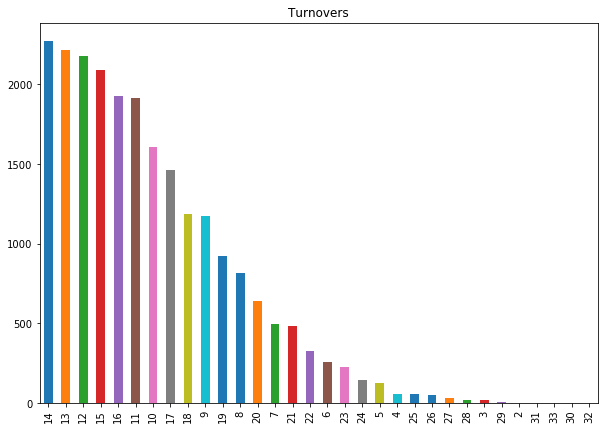

In [26]:
# Looking at breakdown of Turnovers
df2['TOV'].value_counts().plot.bar(figsize=(10,7), title='Turnovers')

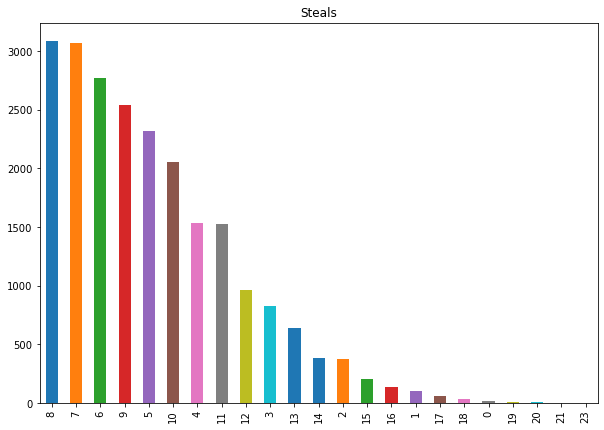

In [27]:
# Looking at breakdown of Steals
df2['STL'].value_counts().plot.bar(figsize=(10,7), title='Steals')

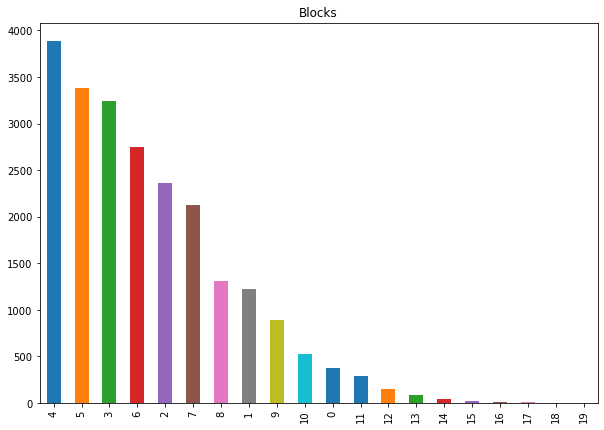

In [28]:
# Looking at breakdown of Blocks
df2['BLK'].value_counts().plot.bar(figsize=(10,7), title='Blocks')

Text(0.5, 1, 'Correlation Heatmap')

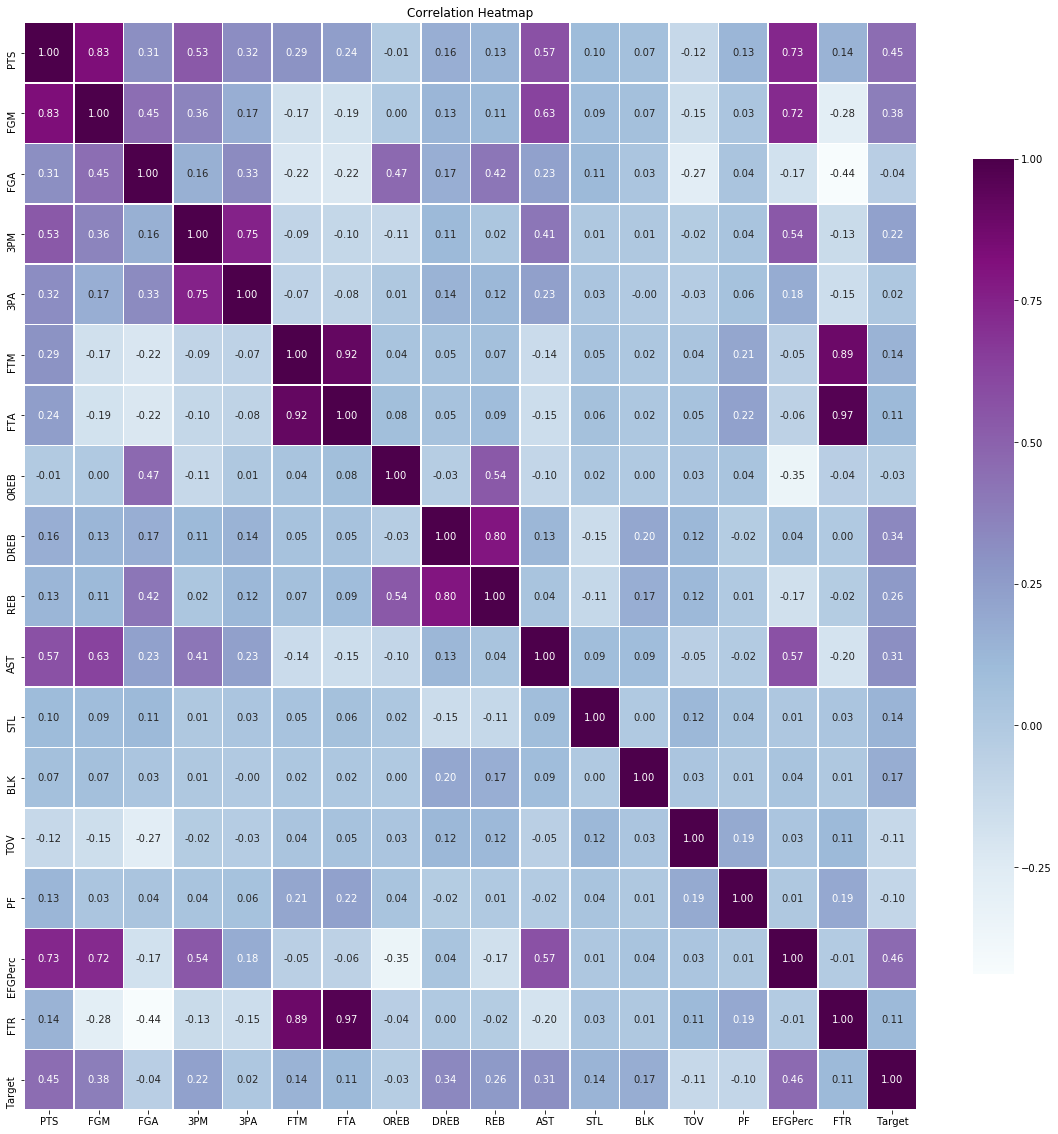

In [29]:
#Created a heatmap to see the correlation between the different variables
#Created a figure and are able to adjust the size of the graph
plt.figure(figsize = (20,20))

#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(df2.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})

#Created a title
plt.title('Correlation Heatmap')

In [30]:
# export working dataframe to csv
df2.to_csv('csv_files/CapstoneEDA.csv')

## Decision Tree

In [31]:
# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# import the packages needed for the Decision Tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  

/opt/tljh/user/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [32]:
# Splitting up our data into variable and target data
X = df2.iloc[:, :-1] # Variable
Y = df2.Target # Target

In [33]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2019)

In [34]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

In [35]:
# Model Accuracy, how often is the Decision Tree correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

Accuracy: 0.7733881627258041
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      3400
           1       0.77      0.78      0.77      3409

    accuracy                           0.77      6809
   macro avg       0.77      0.77      0.77      6809
weighted avg       0.77      0.77      0.77      6809

[[2620  780]
 [ 763 2646]]


In [36]:
# define the feature importance variable 
# use the feature importance values from the decision tree above, sort in descending order 
feature_imp = pd.Series(clf.feature_importances_,index=df2.iloc[:,:-1].columns).sort_values(ascending=False)
# print the results 
feature_imp

EFGPerc    0.215294
DREB       0.113493
REB        0.075056
TOV        0.063893
FGPerc     0.063090
STL        0.059038
FTPerc     0.046894
FGA        0.039384
PF         0.035249
3PPerc     0.034929
PTS        0.034806
AST        0.032177
3PA        0.031437
BLK        0.030277
FTR        0.028983
FTM        0.027622
OREB       0.022605
FGM        0.016837
FTA        0.015952
3PM        0.012984
dtype: float64

## Logistic Regression

In [37]:
# initiate the logistic regression function 
logreg = LogisticRegression()

# pass the training data into the model. This training data includes all of the independent variables 
logreg.fit(X_train,Y_train) 

# tell the model what to predict, or in this case classify, and what variables to use to predict the dependent variable 
Y_pred=logreg.predict(X_test)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
# calculate accuracy, precision and recall? measures of the model 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print('Recall:',metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.8482890292260243
Precision: 0.8502358490566038
Recall: 0.8459958932238193
